# Recency, Frequency, & Monetary Analysis (RFM)

**RFM (Recency, Frequency, Monetary) Analysis** is a powerful method used to evaluate customer behavior and value. Widely applied in database marketing and direct marketing, it has gained significant traction in industries such as retail and professional services. The primary objective of RFM analysis is to segment customers based on their purchasing patterns, allowing businesses to tailor their marketing strategies more effectively.

RFM stands for:

1. Recency – The time elapsed since the customer's last purchase.
2. Frequency – The number of times a customer has made a purchase within a specified period.
3. Monetary Value – The total amount of money spent by the customer.

Before conducting RFM analysis, it is essential to define the objectives and desired outcomes. In this example, the goal is to categorize customers into distinct classes: Platinum, Gold, and Silver.

1. Platinum customers are those who purchase frequently and generate high revenue.
2. Gold customers are frequent purchasers but contribute less revenue.
3. Silver customers are those who purchase less frequently and generate lower revenue.

This segmentation helps businesses identify and prioritize high-value customers, optimize marketing efforts, and enhance overall customer retention strategies.


In [145]:
#Importing packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [146]:
#Reading data through Pandas and creating a dataframe

df = pd.read_csv('/Users/johndoe/Downloads/data.csv', encoding="ISO-8859-1")

In [147]:
#Fetching top 5 rows of the dataframe

df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [148]:
#Dataframe information

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [149]:
#Country with the highest count must be taken for testing purposes

df.Country.value_counts().head(5)

Country
United Kingdom    495478
Germany             9495
France              8557
EIRE                8196
Spain               2533
Name: count, dtype: int64

In [150]:
#United Kingdom had the highest amount of invoice records

df = df[df.Country == 'United Kingdom']
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


<Axes: ylabel='Quantity'>

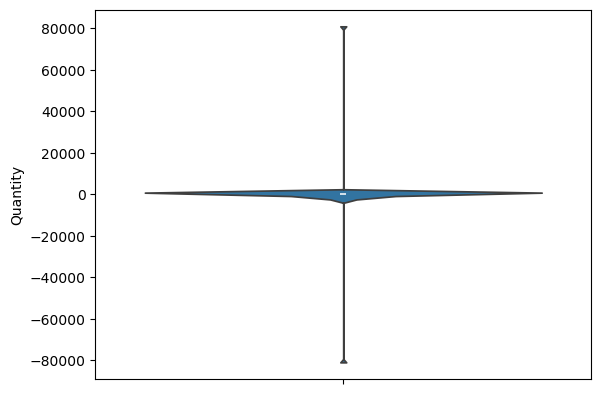

In [151]:
#Checking distribution of the Quantity column using a violin plot using seaborn library
#Violin plot depicts distributions of numeric data for one or more groups using density curves. 
#The width of each curve corresponds with the approximate frequency of data points in each region.

sns.violinplot(df.Quantity)

In [152]:
#Quantity Description

df.Quantity.describe()

count    495478.000000
mean          8.605486
std         227.588756
min      -80995.000000
25%           1.000000
50%           3.000000
75%          10.000000
max       80995.000000
Name: Quantity, dtype: float64

In [153]:
#Quantity can not be negative, hence we'll be removing the negative values. 
#Here the negative values can be due to the fact that the product was returned or was cancelled, however in this RFM analysis we'll be ignoring those values, or casees where an order was either cancelled or returned. 

df = df[df['Quantity']>0]
df.Quantity.describe()

count    486286.000000
mean          9.734640
std         163.262428
min           1.000000
25%           1.000000
50%           3.000000
75%          10.000000
max       80995.000000
Name: Quantity, dtype: float64

<Axes: ylabel='UnitPrice'>

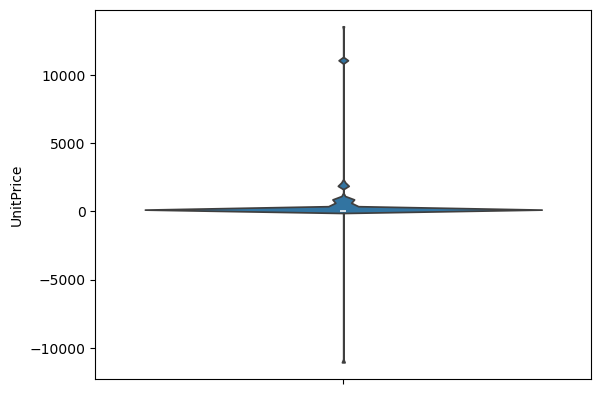

In [154]:
#Checking distribution of Unit Price column using a violin plot using seaborn library.

sns.violinplot(df.UnitPrice)

In [155]:
#Removing the negative values and zero values from the Unit Price column

df = df[df['UnitPrice']>0]
df.UnitPrice.describe()

count    485123.000000
mean          3.849679
std          34.677371
min           0.001000
25%           1.250000
50%           2.100000
75%           4.130000
max       13541.330000
Name: UnitPrice, dtype: float64

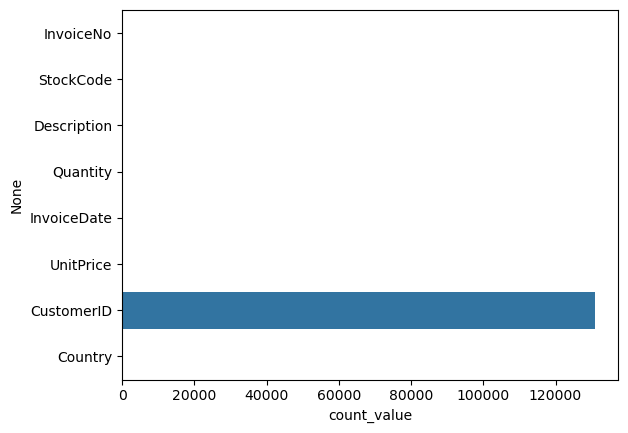

In [156]:
#Checking for null values in all columns in the dataset and creating a bar plot using seaborn


null_values = pd.DataFrame(df.isnull().sum(),columns=['count_value'])
ax = sns.barplot(x='count_value', y=null_values.index, data=null_values)

In [157]:
#Dropping null values in the dataset

df.dropna(subset=['CustomerID'],how='all',inplace=True)

In [158]:
#Rechecking for any null values in the dataset

df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [159]:
#Fetching the last date available in the dataset

df['InvoiceDate'].max()

'9/9/2011 9:52'

In [160]:
#importing datetime package

import datetime as dt

In [161]:
#Using the latest date in our data as current date

current_date = dt.datetime.now()
current_date

datetime.datetime(2024, 8, 23, 0, 20, 45, 444037)

In [162]:
#Creating a new column in the dataframe to store the date from the InvoiceDate column

df['date'] = pd.DatetimeIndex(df.InvoiceDate).date

In [163]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,date
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01


Calculating Recency

Recency in RFM analysis refers to how recently a customer made their last purchase. It measures the time since the last transaction, with the idea that more recent purchases indicate higher engagement and likelihood of future purchases. Recency helps identify loyal customers and those who may need re-engagement.

In [164]:
#Grouping by customers by the last date they purchased. This will help us in calculating the recency of the customer. 

recency_df = df.groupby(['CustomerID'],as_index=False)['date'].max()
recency_df.columns = ['CustomerID','LastPurchaseDate']
recency_df.head()

,CustomerID,LastPurchaseDate
0,12346.0,2011-01-18
1,12747.0,2011-12-07
2,12748.0,2011-12-09
3,12749.0,2011-12-06
4,12820.0,2011-12-06


In [165]:
#Calculating the recency of the customer by subtracting the last purchase date from the current date

current_date = dt.datetime.now().date()
recency_df['Recency'] = recency_df.LastPurchaseDate.apply(lambda x : (current_date - x).days)

In [166]:
recency_df.head()

,CustomerID,LastPurchaseDate,Recency
0,12346.0,2011-01-18,4966
1,12747.0,2011-12-07,4643
2,12748.0,2011-12-09,4641
3,12749.0,2011-12-06,4644
4,12820.0,2011-12-06,4644


In [167]:
#Dropping the LastPurchaseDate column as we have already calculated the recency of the customer

recency_df.drop(columns=['LastPurchaseDate'],inplace=True)

In [168]:
recency_df.head()

,CustomerID,Recency
0,12346.0,4966
1,12747.0,4643
2,12748.0,4641
3,12749.0,4644
4,12820.0,4644


Calculating Frequency

Frequency in RFM analysis refers to how often a customer makes a purchase within a specific period. It measures the number of transactions or interactions a customer has with a business. Higher frequency indicates a more engaged and loyal customer who regularly buys from the brand. By analyzing frequency, businesses can identify their most active customers and develop strategies to maintain or increase this engagement.

In [169]:
#Calculating the frequency of the customer by counting the number of unique invoices for each customer

frequency_df = df.copy()
frequency_df.drop_duplicates(subset=['CustomerID','InvoiceNo'], keep="first", inplace=True) 
frequency_df = frequency_df.groupby('CustomerID',as_index=False)['InvoiceNo'].count()
frequency_df.columns = ['CustomerID','Frequency']
frequency_df.head()

,CustomerID,Frequency
0,12346.0,1
1,12747.0,11
2,12748.0,209
3,12749.0,5
4,12820.0,4


Calculating Monetary

Monetary in RFM analysis refers to the total amount of money a customer has spent over a specific period. It measures the financial value a customer brings to the business. Customers with higher monetary values are often the most valuable, as they contribute the most revenue

In [170]:
#Calculating the monetary value of the customer by summing the total cost of the products purchased by each customer

df['Total_cost'] = df['UnitPrice'] * df['Quantity']
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,date,Total_cost
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,2010-12-01,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,2010-12-01,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01,20.34


In [171]:
#Grouping by customers and calculating the total cost of the products purchased by each customer

monetary_df=df.groupby('CustomerID',as_index=False)['Total_cost'].sum()
monetary_df.columns = ['CustomerID','Monetary']

In [172]:
monetary_df.head()

,CustomerID,Monetary
0,12346.0,77183.60
1,12747.0,4196.01
2,12748.0,33719.73
3,12749.0,4090.88
4,12820.0,942.34


In [173]:
#Combining the recency, frequency and monetary values of the customers into a single dataframe

#Combining recency and frequency values

rf = recency_df.merge(frequency_df,left_on='CustomerID',right_on='CustomerID')

#Combining the above dataframe with the monetary values of the customers

rfm = rf.merge(monetary_df,left_on='CustomerID',right_on='CustomerID').reset_index(drop=True)

In [174]:
rfm.head()

,CustomerID,Recency,Frequency,Monetary
0,12346.0,4966,1,77183.60
1,12747.0,4643,11,4196.01
2,12748.0,4641,209,33719.73
3,12749.0,4644,5,4090.88
4,12820.0,4644,4,942.34


In [175]:
#Checking the correctness of the RFM values for a particular customer

df[df.CustomerID == 12346.0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,date,Total_cost
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,1/18/2011 10:01,1.04,12346.0,United Kingdom,2011-01-18,77183.6


In [176]:
t_days = (current_date - dt.datetime(2011,1,18).date()).days
t_days

4966

In [177]:
#Bringing all the quartile values in a single dataframe

rfm_segmentation = rfm.copy()
rfm_segmentation

,CustomerID,Recency,Frequency,Monetary
0,12346.0,4966,1,77183.60
1,12747.0,4643,11,4196.01
2,12748.0,4641,209,33719.73
3,12749.0,4644,5,4090.88
4,12820.0,4644,4,942.34
...,...,...,...,...
3915,18280.0,4918,1,180.60
3916,18281.0,4821,1,80.82
3917,18282.0,4648,2,178.05
3918,18283.0,4644,16,2094.88


In [178]:
from sklearn.cluster import KMeans 

**K-Means Algorithm**

K-Means is a popular unsupervised machine learning algorithm used for clustering tasks. The goal of K-Means is to partition a dataset into distinct groups (or clusters) based on the features of the data. Here's how the algorithm works:

Initialization:
1. Select the number of clusters 𝑘 that you want to create.
2. Randomly initialize 𝑘 cluster centroids (these are points in the feature space that represent the center of a cluster).

Assignment Step:
1. For each data point in the dataset, calculate the distance between the data point and each of the 𝑘 centroids.
2. Assign each data point to the closest centroid, thereby creating 𝑘 clusters.

Update Step:
1. For each cluster, recalculate the centroid by taking the mean of all the data points assigned to that cluster.
2. Update the position of the centroid to this new mean value.

Repeat:
1. Repeat the Assignment and Update steps until the centroids no longer change significantly or a predefined number of iterations is reached.

Convergence:
1. The algorithm converges when the centroids stabilize (i.e., they no longer move significantly between iterations), indicating that the clusters are well-formed.

Key Points:
1. The algorithm aims to minimize the within-cluster sum of squares (WCSS), which is the sum of squared distances between each point and the centroid of the cluster it's assigned to.
2. The choice of 𝑘 (the number of clusters) is crucial for the performance of the algorithm.

**Elbow Method**

The Elbow Method is a technique used to determine the optimal number of clusters 𝑘 in a K-Means clustering algorithm. The method involves the following steps:

Run K-Means for Different Values of 𝑘:
1. Fit the K-Means algorithm on the data for a range of values for 𝑘 (e.g., from 1 to 20 clusters).
2. For each 𝑘, compute the sum of squared distances between data points and their assigned cluster centroids. This is often referred to as the inertia or within-cluster sum of squares (WCSS).

Plot the Results:

1. Plot the WCSS against the number of clusters 𝑘.
2. This plot typically shows a decreasing curve, as adding more clusters reduces the WCSS (because more centroids mean data points are closer to their assigned centroids).

Identify the "Elbow" Point:
1. The "elbow" point on the plot is where the rate of decrease in WCSS slows down, forming a bend or elbow-like shape.
2. The value of 𝑘 at this elbow point is considered optimal because adding more clusters beyond this point doesn't significantly improve the model (i.e., it only marginally reduces the WCSS).

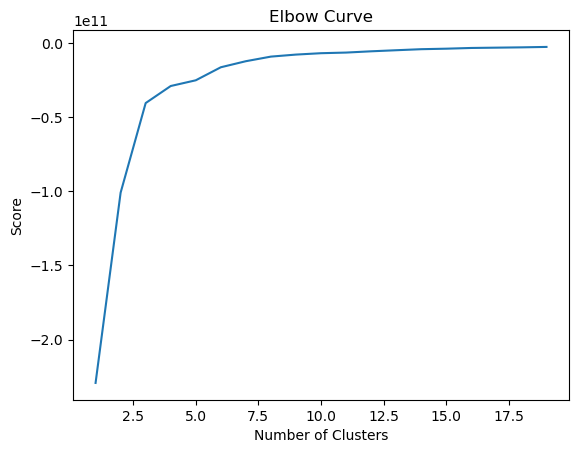

In [179]:
#Using KMeans clustering to segment the customers into different clusters based on the RFM values
#Getting the right number of cluster for K-means so we neeed to loop from 1 to 20 number of cluster and check the score.
#Elbow method is used to represent that. 

Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
score = [kmeans[i].fit(rfm_segmentation).score(rfm_segmentation) for i in range(len(kmeans))]
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [180]:
#Fitting data in Kmeans theorem.

kmeans = KMeans(n_clusters=3, random_state=0).fit(rfm_segmentation)

In [181]:
#This creates a new column called cluster which has cluster number for each row respectively.

rfm_segmentation['cluster'] = kmeans.labels_

In [182]:
rfm_segmentation.head()

,CustomerID,Recency,Frequency,Monetary,cluster
0,12346.0,4966,1,77183.60,2
1,12747.0,4643,11,4196.01,0
2,12748.0,4641,209,33719.73,2
3,12749.0,4644,5,4090.88,0
4,12820.0,4644,4,942.34,0


In [183]:
#Checking our hypothesis

rfm_segmentation[rfm_segmentation.cluster == 0].head(10)

,CustomerID,Recency,Frequency,Monetary,cluster
1,12747.0,4643,11,4196.01,0
3,12749.0,4644,5,4090.88,0
4,12820.0,4644,4,942.34,0
5,12821.0,4855,1,92.72,0
6,12822.0,4711,2,948.88,0
7,12823.0,4715,5,1759.50,0
8,12824.0,4700,1,397.12,0
9,12826.0,4643,7,1474.72,0
10,12827.0,4646,3,430.15,0
11,12828.0,4643,6,1018.71,0


In [184]:
rfm_segmentation[rfm_segmentation.cluster == 1].head(10)

,CustomerID,Recency,Frequency,Monetary,cluster
2598,16446.0,4641,2,168472.50,1
3314,17450.0,4649,46,194550.79,1
3783,18102.0,4641,60,259657.30,1


In [185]:
rfm_segmentation[rfm_segmentation.cluster == 2].head(10)

,CustomerID,Recency,Frequency,Monetary,cluster
0,12346.0,4966,1,77183.60,2
2,12748.0,4641,209,33719.73,2
82,12931.0,4662,15,42055.96,2
187,13081.0,4652,11,28337.38,2
191,13089.0,4643,97,58825.83,2
199,13098.0,4642,28,28882.44,2
424,13408.0,4642,62,28117.04,2
620,13694.0,4644,50,65039.62,2
682,13777.0,4641,33,25977.16,2
693,13798.0,4642,57,37153.85,2


<Axes: xlabel='cluster', ylabel='Recency'>

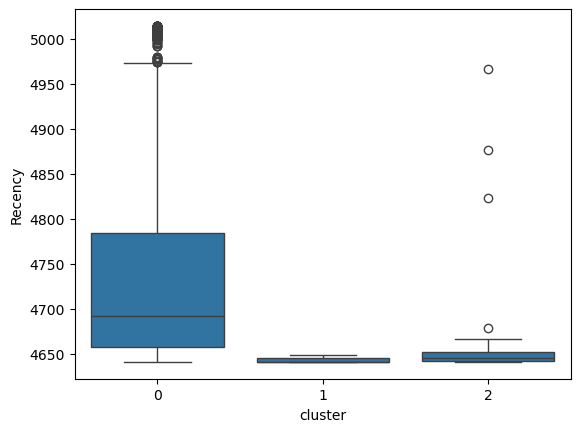

In [186]:
#Cluster 0 have high recency rate which is bad (the customer hasn't purchased in a long time). Cluster 1 and cluster 2 have low recency rates so they are in segmentation of platinum and gold customers.

sns.boxplot(x=rfm_segmentation.cluster, y=rfm_segmentation.Recency, data=rfm_segmentation)

<Axes: xlabel='cluster', ylabel='Frequency'>

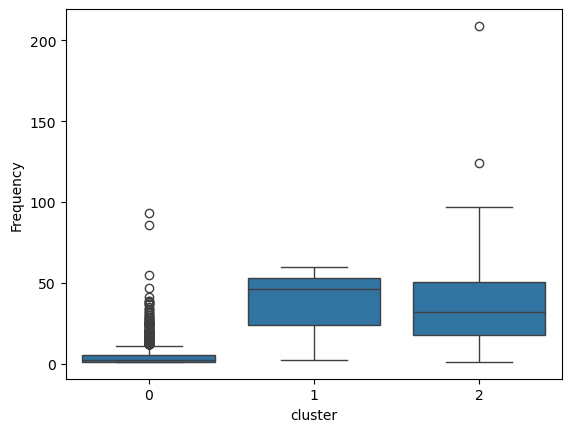

In [187]:
#Cluster 0 have low frequency rates which is bad. Cluster 1 and cluster 2 have high frequency rates so they are in segmentation of platinum and gold customers.

sns.boxplot(x=rfm_segmentation.cluster, y=rfm_segmentation.Frequency, data=rfm_segmentation)

<Axes: xlabel='cluster', ylabel='Monetary'>

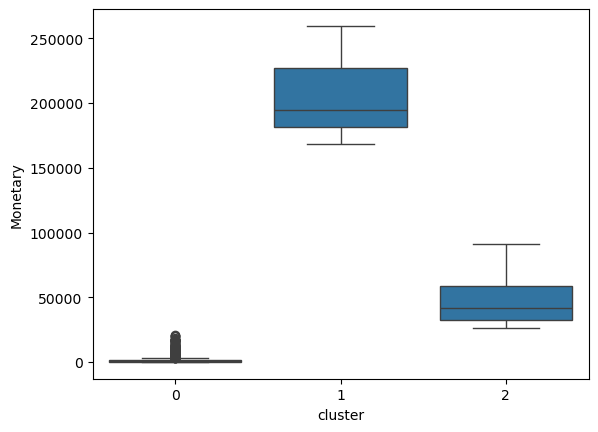

In [188]:
#Cluster 0 has Low Monetary rates which is bad (the customer in cluster 1 spends less money). Cluster 1 has the highest Montary (money spend), therefore it would be segmented in the platinum tier, whereas, cluster 2 has medium monetary rates, therefore a Gold tier would be more apt, and cluster 0 would be classified as a silver customer.

sns.boxplot(x=rfm_segmentation.cluster, y=rfm_segmentation.Monetary, data=rfm_segmentation)

# Based on customer Segmentation we found out:

**1. Cluster 1 is a Platinum Tier Customers**

**2. Cluster 2 is a Gold Tier Customers**

**3. Cluster 3 is a Silver Tier Customers**

# Further Steps for more granularity.

In [189]:
#Arguments (x = value, p = recency, d = quartiles dict)

#Lower the recency the better it is for the store.

def RScore(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4
    
    
# Arguments (x = value, p = monetary_value, frequency, d = quartiles dict)

#Higher value of frequency and monetary rates lead to a good consumer and is eventually better for the store. Here higher value = 1 (in a reverse manner).

def FMScore(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1

**A quantile divides a dataset into equal parts. For example, if you have 100 values:**

1. The first quartile (25th percentile) contains the lowest 25% of the data.
2. The second quartile (50th percentile or median) includes the next 25%, meaning up to 50% of the data.
3. The third quartile (75th percentile) covers the next 25%, meaning up to 75% of the data.
4. The fourth quartile contains the highest 25% of the values, representing anything above the 75th percentile.

In [190]:
#The quantile() method calculates the quantile of the values in a given axis. Default axis is row.
#By specifying the column axis (axis='columns'), the quantile() method calculates the quantile column-wise and returns the mean value for each row.

quantile = rfm.quantile(q=[0.25,0.5,0.75])
quantile

,CustomerID,Recency,Frequency,Monetary
0.25,14208.75,4658.0,1.0,300.280
0.50,15569.50,4691.0,2.0,652.280
0.75,16913.25,4783.0,5.0,1576.585


In [191]:
rfm_segmentation['R_Quartile'] = rfm_segmentation['Recency'].apply(RScore,args=('Recency',quantile))
rfm_segmentation['F_Quartile'] = rfm_segmentation['Frequency'].apply(FMScore, args=('Frequency',quantile))
rfm_segmentation['M_Quartile'] = rfm_segmentation['Monetary'].apply(FMScore, args=('Monetary',quantile))

In [192]:
quantile.to_dict()

{'CustomerID': {0.25: 14208.75, 0.5: 15569.5, 0.75: 16913.25},
 'Recency': {0.25: 4658.0, 0.5: 4691.0, 0.75: 4783.0},
 'Frequency': {0.25: 1.0, 0.5: 2.0, 0.75: 5.0},
 'Monetary': {0.25: 300.28000000000003, 0.5: 652.28, 0.75: 1576.585}}

In [193]:
#Calculating RFM score

rfm_segmentation['RFMScore'] = rfm_segmentation.R_Quartile.map(str) \
                            + rfm_segmentation.F_Quartile.map(str) \
                            + rfm_segmentation.M_Quartile.map(str)
rfm_segmentation.head()

,CustomerID,Recency,Frequency,Monetary,cluster,R_Quartile,F_Quartile,M_Quartile,RFMScore
0,12346.0,4966,1,77183.60,2,4,4,1,441
1,12747.0,4643,11,4196.01,0,1,1,1,111
2,12748.0,4641,209,33719.73,2,1,1,1,111
3,12749.0,4644,5,4090.88,0,1,2,1,121
4,12820.0,4644,4,942.34,0,1,2,2,122


In [194]:
#Another approach is to combine the individual scores by adding them together (e.g., 4+1+1), resulting in a total score ranging from 3 to 12. The advantage of this method is that it gives equal weight to each score. However, this approach can lead to multiple combinations that result in the same total score (e.g., 413 and 431).

rfm_segmentation['Total_score'] = rfm_segmentation['R_Quartile'] + rfm_segmentation['F_Quartile'] + \
rfm_segmentation['M_Quartile']

In [195]:
rfm_segmentation.head()

,CustomerID,Recency,Frequency,Monetary,cluster,R_Quartile,F_Quartile,M_Quartile,RFMScore,Total_score
0,12346.0,4966,1,77183.60,2,4,4,1,441,9
1,12747.0,4643,11,4196.01,0,1,1,1,111,3
2,12748.0,4641,209,33719.73,2,1,1,1,111,3
3,12749.0,4644,5,4090.88,0,1,2,1,121,4
4,12820.0,4644,4,942.34,0,1,2,2,122,5


In [196]:
print("Best Customers: ",len(rfm_segmentation[rfm_segmentation['RFMScore']=='111']))
print('Loyal Customers: ',len(rfm_segmentation[rfm_segmentation['F_Quartile']==1]))
print("Big Spenders: ",len(rfm_segmentation[rfm_segmentation['M_Quartile']==1]))
print('Almost Lost: ', len(rfm_segmentation[rfm_segmentation['RFMScore']=='134']))
print('Lost Customers: ',len(rfm_segmentation[rfm_segmentation['RFMScore']=='344']))
print('Lost Cheap Customers: ',len(rfm_segmentation[rfm_segmentation['RFMScore']=='444']))

Best Customers:  423
Loyal Customers:  791
Big Spenders:  980
Almost Lost:  31
Lost Customers:  187
Lost Cheap Customers:  396


In [197]:
rfm_segmentation.sort_values(by=['RFMScore', 'Monetary'], ascending=[True, False])

,CustomerID,Recency,Frequency,Monetary,cluster,R_Quartile,F_Quartile,M_Quartile,RFMScore,Total_score
3783,18102.0,4641,60,259657.30,1,1,1,1,111,3
3314,17450.0,4649,46,194550.79,1,1,1,1,111,3
3356,17511.0,4643,31,91062.38,2,1,1,1,111,3
2766,16684.0,4645,28,66653.56,2,1,1,1,111,3
902,14096.0,4645,17,65164.79,2,1,1,1,111,3
...,...,...,...,...,...,...,...,...,...,...
3075,17102.0,4902,1,25.50,0,4,4,4,444,12
2150,15823.0,5013,1,15.00,0,4,4,4,444,12
3545,17763.0,4904,1,15.00,0,4,4,4,444,12
3680,17956.0,4890,1,12.75,0,4,4,4,444,12


In [198]:
rfm_segmentation.groupby('RFMScore')['Monetary'].mean()

RFMScore
111     8443.319409
112     1241.785577
113      443.086667
114      201.120000
121     2482.559268
           ...     
434      208.722982
441    14665.555000
442      942.920313
443      402.421137
444      158.611742
Name: Monetary, Length: 61, dtype: float64

In [199]:
rfm_segmentation.groupby('Total_score')['Monetary'].mean()

Total_score
3     8443.319409
4     3476.003567
5     2334.664483
6     1396.382037
7     1129.331281
8      695.442278
9      704.139754
10     363.057451
11     280.865560
12     158.611742
Name: Monetary, dtype: float64

<Axes: xlabel='Total_score'>

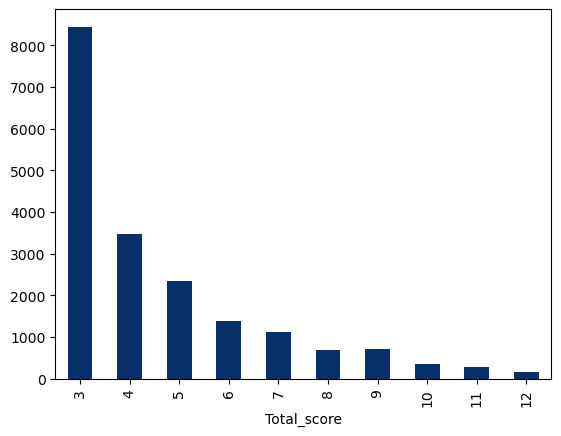

In [200]:
#Based on the Monetary value, we observe that a Total_score of 3, 4, or 5 is ideal for the model. This is favorable because it could represent combinations like 111, 121, 122, etc.

rfm_segmentation.groupby('Total_score')['Monetary'].mean().plot(kind='bar', colormap='Blues_r')

<Axes: xlabel='Total_score'>

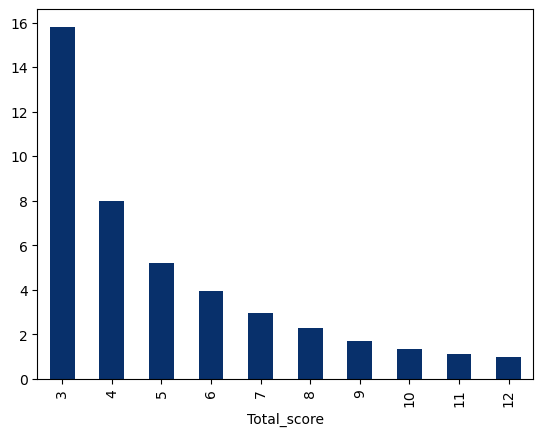

In [201]:
#Based on the Frequency value, we observe that a Total_score of 3, 4, or 5 is ideal for the model. This is favorable because it could represent combinations like 111, 121, 122, etc.

rfm_segmentation.groupby('Total_score')['Frequency'].mean().plot(kind='bar', colormap='Blues_r')

<Axes: xlabel='Total_score'>

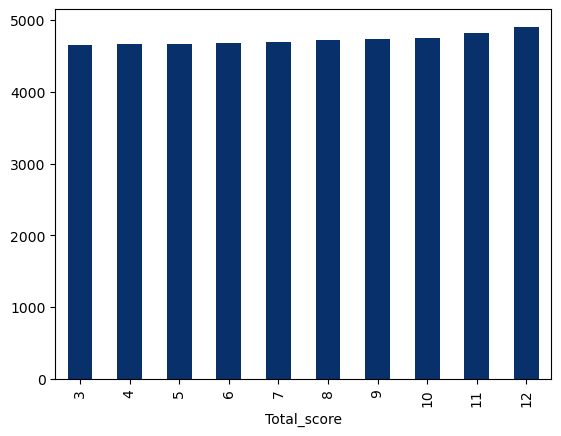

In [202]:
#Based on the Recency value, we observe that a Total_score of 10, 11, or 12 is ideal for the model. This is favorable because it could represent combinations like 444, 434, 334, etc.

rfm_segmentation.groupby('Total_score')['Recency'].mean().plot(kind='bar', colormap='Blues_r')